In [1]:
import numpy as np
import matplotlib.pyplot as plt                 #For plotting
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf
figlist = []
#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                   
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'lines.linewidth': 2.0}
pylab.rcParams.update(params)
#********************************************************************************************************
import os

In [2]:
NRINPrevData = np.loadtxt('../20200302_ISS_RIN_Max_ISS/NRIN_Data_2020-03-03.txt')
SRINPrevData = np.loadtxt('../20200302_ISS_RIN_Max_ISS/SRIN_Data_2020-03-03.txt')

In [3]:
SR785 = np.concatenate([np.loadtxt('MeasSetupnoise1_05-03-2020_114141.txt'),
                        np.loadtxt('MeasSetupnoise2_05-03-2020_114407.txt')[7:, :]])

In [4]:
fList = [fn for fn in os.listdir() if fn.find('TransSpecData')!=-1]
ff = np.loadtxt(fList[0])[:, 0]
NRIN = np.zeros((len(ff), len(fList)))
NDarkNoise = 0
NOscOffset = 0
NDC = 472e-3 - NOscOffset - NDarkNoise
done=False
while(done==False):
    for ii, fn in enumerate(fList):
        try:
            data = np.loadtxt(fn)
            NRIN[:, ii] = data[:, 1]/NDC
        except BaseException as e:
            print(fn)
            print(e)
            fList.remove(fn)
            np.delete(NRIN, ii)
            break
        if ii == len(fList)-1:
            done=True

NRINmed = np.median(NRIN, axis=1)
NRINlb = np.sqrt(np.percentile(NRIN**2, 15.865, axis=1,))
NRINub = np.sqrt(np.percentile(NRIN**2, 84.135, axis=1,))
meanNDC = NDC

TransSpecData_05-03-2020_134516.txt
could not broadcast input array from shape (872) into shape (1593)
TransSpecData_05-03-2020_154325.txt
could not broadcast input array from shape (800) into shape (1593)


/home/controls/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: loadtxt: Empty input file: "TransSpecData_05-03-2020_154353.txt"
  # This is added back by InteractiveShellApp.init_path()


TransSpecData_05-03-2020_154353.txt
too many indices for array


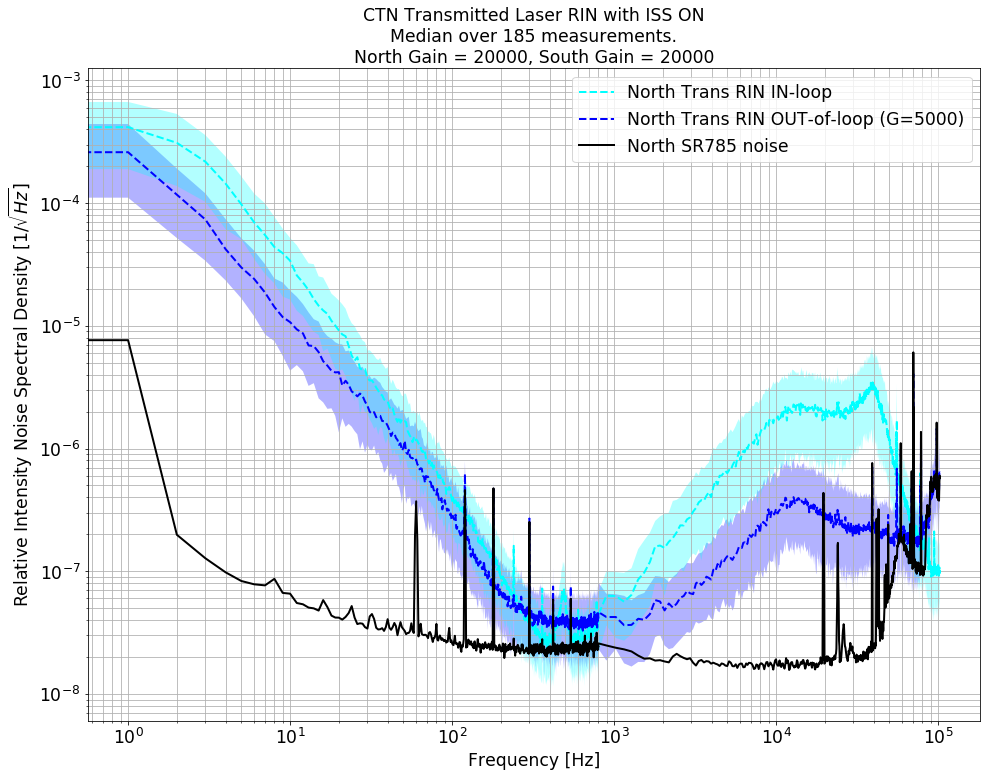

In [5]:
fig = plt.figure(figsize=[16, 12])
ax = fig.gca()
ax.loglog(ff, NRINPrevData[:, 1], label='North Trans RIN IN-loop', color='cyan', ls='--')
ax.loglog(ff, NRINmed, label='North Trans RIN OUT-of-loop (G=5000)', color='blue', ls='--')
#ax.loglog(ff, SRINmed, label='South Trans RIN', color='red', ls='--')
ax.loglog(ff, SR785[:, 1]/meanNDC, label='North SR785 noise', color='k')
#ax.loglog(ff, SR785[:, 2]/meanSDC, label='South SR785 noise', color='brown')
ax.fill_between(ff, NRINlb, NRINub, color='blue', alpha='0.3', lw=0)
ax.fill_between(ff, NRINPrevData[:, 2], NRINPrevData[:, 3], color='cyan', alpha='0.3', lw=0)
#ax.fill_between(ff, SRINlb, SRINub, color='red', alpha='0.3', lw=0)
ax.legend()
ax.grid('on', which='both')
ax.set_title('CTN Transmitted Laser RIN with ISS ON'
             '\nMedian over '+str(len(fList))+' measurements.'
             '\nNorth Gain = 20000, South Gain = 20000')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Relative Intensity Noise Spectral Density [$1/\sqrt{Hz}$]')
figlist = [fig]

In [6]:
NRINData = np.transpose(np.vstack([ff, NRINmed, NRINlb, NRINub]))

In [7]:
np.savetxt('NRIN_Data_2020-03-05-OOL-Possibly_Wrong.txt', NRINData,
          header='# Data taken on March 5th, 2020 with ISS on at gain of 20000 and HP-LP coincident on 300 Hz.\n'
                 '# Out of loop detector was used but the DC value was measured before all measurements and hence '
                 'RIN calculation might be off.' )

In [8]:
pp = PdfPages('CTN_Trans_North_RIN_measurement.pdf')
for fig in figlist:
    pp.savefig(fig,bbox_inches='tight')
pp.close()